# Analysis of ABC results

This notebook provides example code that can be used to analyse the `.csv` output of HAPNEST's `optimisation` pipeline. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = 'example_abc_output.csv' # change this to the path of your output file

In [3]:
df = pd.read_csv(filepath)
df.head()

,Ne,ρ,d
0,43107.620114,2.092408,0.107937
1,11252.701253,0.030520,0.033486
2,10205.475897,1.985109,0.091958
3,14061.598255,2.841339,0.101702
4,33432.707961,1.185809,0.101392


In [4]:
def plot_marginal(df, parameter, threshold, outpath):
    """Plot marginal distribution for given parameter and threshold value
    """
    df_plot = df[df['d']<=threshold]
    mean = round(df_plot[parameter].mean(),3)
    g = sns.histplot(data=df_plot, x=parameter, kde=True)
    g.set_title("Marginal distribution of {} (mean {}, threshold {})".format(parameter, mean, threshold))
    plt.savefig(outpath, dpi=300)
    plt.show()
   

def plot_joint(df, parameter1, parameter2, threshold, outpath):
    """Plot joint distribution for two parameters and threshold value
    """
    df_plot = df[df['d']<=threshold]
    mean1 = round(df_plot[parameter1].mean(),3)
    mean2 = round(df_plot[parameter2].mean(),3)
    g = sns.jointplot(data=df_plot, x=parameter1, y=parameter2, kind='scatter')
    g.fig.subplots_adjust(top=0.95) # reduce plot to make room for title
    g.fig.suptitle("Joint distributions of {} (mean {}) and {} (mean {})".format(parameter1, mean1, parameter2, mean2))
    plt.savefig(outpath, dpi=300)
    plt.show()

In [5]:
threshold = 0.1

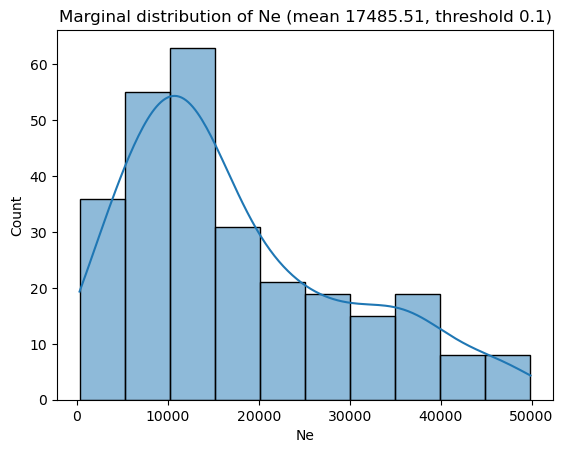

In [6]:
plot_marginal(df, parameter='Ne', threshold=threshold, outpath='marginal1.png')

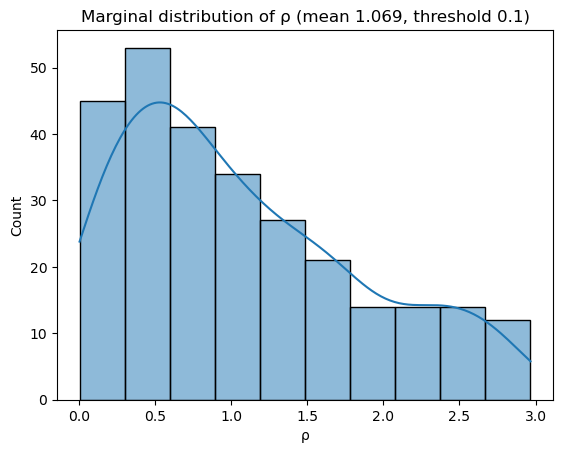

In [7]:
plot_marginal(df, parameter='ρ', threshold=threshold, outpath='marginal2.png')

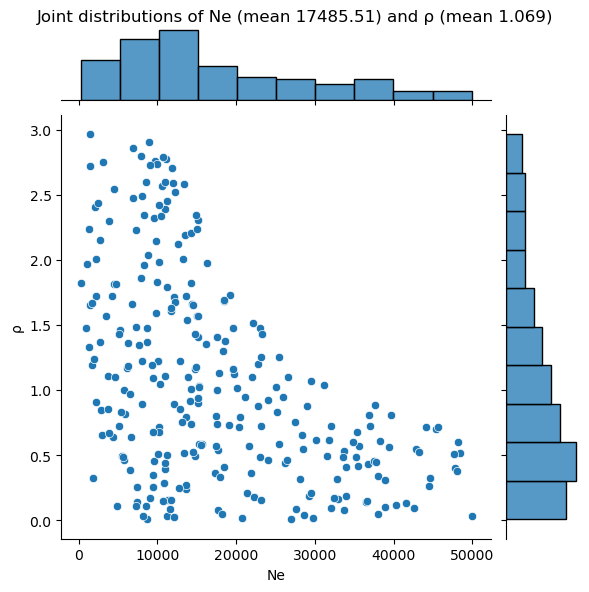

In [8]:
plot_joint(df, parameter1='Ne', parameter2='ρ', threshold=threshold, outpath='joint.png')